In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

In [21]:
df = pd.read_csv(r"C:\Users\User\Desktop\Nida\dads5001\public_150k_plus_230101.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968531 entries, 0 to 968530
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   LoanNumber                   968531 non-null  int64  
 1   DateApproved                 968531 non-null  object 
 2   SBAOfficeCode                968531 non-null  int64  
 3   ProcessingMethod             968531 non-null  object 
 4   BorrowerName                 968527 non-null  object 
 5   BorrowerAddress              968517 non-null  object 
 6   BorrowerCity                 968519 non-null  object 
 7   BorrowerState                968518 non-null  object 
 8   BorrowerZip                  968518 non-null  object 
 9   LoanStatusDate               930864 non-null  object 
 10  LoanStatus                   968531 non-null  object 
 11  Term                         968531 non-null  int64  
 12  SBAGuarantyPercentage        968531 non-null  int64  
 13 

In [42]:
df.iloc[1:10,13:15]

,InitialApprovalAmount,CurrentApprovalAmount
1,736927.79,736927.79
2,691355.00,691355.00
3,499871.00,499871.00
4,367437.00,367437.00
5,328840.00,328840.00
6,289765.00,289765.00
7,272380.00,272380.00
8,257088.00,257088.00
9,250000.00,250000.00


In [22]:
#find NaN in data
df.isna().sum()

LoanNumber                          0
DateApproved                        0
SBAOfficeCode                       0
ProcessingMethod                    0
BorrowerName                        4
BorrowerAddress                    14
BorrowerCity                       12
BorrowerState                      13
BorrowerZip                        13
LoanStatusDate                  37667
LoanStatus                          0
Term                                0
SBAGuarantyPercentage               0
InitialApprovalAmount               0
CurrentApprovalAmount               0
UndisbursedAmount                  47
FranchiseName                  933126
ServicingLenderLocationID           0
ServicingLenderName                 0
ServicingLenderAddress              0
ServicingLenderCity                 0
ServicingLenderState                0
ServicingLenderZip                  0
RuralUrbanIndicator                 0
HubzoneIndicator                    0
LMIIndicator                        0
BusinessAgeD

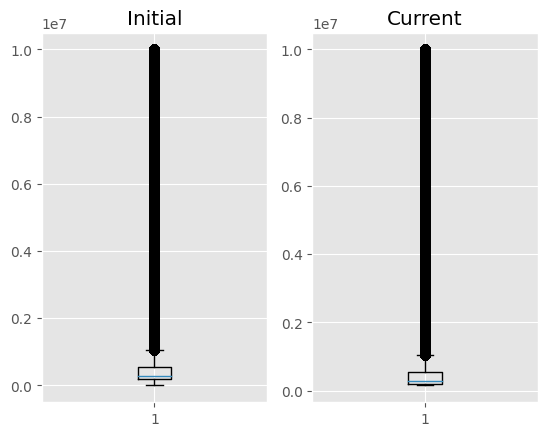

In [23]:
#boxplox looking for outliner
plt.subplot(1,2,1)
plt.boxplot(df['InitialApprovalAmount'])
plt.title('Initial')

plt.subplot(1,2,2)
plt.boxplot(df['CurrentApprovalAmount'])
plt.title('Current')
plt.show()

In [47]:
pd.options.display.float_format = "{:,.2f}".format
df.describe()

,LoanNumber,SBAOfficeCode,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,ServicingLenderLocationID,JobsReported,NAICSCode,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,OriginatingLenderLocationID,ForgivenessAmount
count,"968,531.00","968,531.00","968,531.00","968,531.00","968,531.00","968,531.00","968,484.00","968,531.00","968,530.00","961,903.00","339,377.00","966,699.00","46,183.00","99,533.00","22,855.00","57,446.00","31,717.00","968,531.00","938,885.00"
mean,"5,427,136,608.58",571.52,36.38,100.00,"532,253.66","530,622.09",15.16,"108,106.65",51.89,"511,805.52","14,929.80","514,878.68","48,155.43","56,195.29","6,897.80","46,860.43","14,358.66","107,644.44","528,512.69"
std,"2,551,313,343.31",263.02,17.29,0.00,"744,251.43","737,887.06","4,109.78","133,018.40",67.55,"181,178.02","84,936.22","714,056.83","159,092.87","111,375.52","62,140.69","102,911.18","55,493.47","134,878.84","731,500.12"
min,"1,000,007,108.00",101.00,0.00,100.00,0.00,"150,000.00",0.00,20.00,0.00,"111,110.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.01
25%,"3,271,107,852.50",373.00,24.00,100.00,"200,200.00","200,400.00",0.00,"29,805.00",18.00,"336,612.00",1.00,"195,600.00",0.00,"13,525.00",0.00,"8,000.00",0.00,"29,805.00","200,846.34"
50%,"5,400,677,205.00",515.00,24.00,100.00,"295,177.00","295,000.00",0.00,"56,102.00",30.00,"541,211.00",1.00,"287,079.27","10,000.00","28,873.00",0.00,"19,440.00",500.00,"56,102.00","295,175.16"
75%,"7,546,303,101.50",811.00,60.00,100.00,"540,200.00","539,384.33",0.00,"117,436.00",54.00,"623,110.00","4,500.00","524,603.50","40,255.50","56,250.00",0.00,"44,000.00","9,908.00","112,407.00","539,942.05"
max,"9,999,007,109.00","1,094.00",180.00,100.00,"10,000,000.00","10,000,000.00","2,400,000.00","538,160.00",500.00,"999,990.00","10,000,000.00","10,000,000.00","10,000,000.00","5,518,277.93","2,951,590.00","3,880,000.00","2,497,617.00","533,479.00","10,265,277.78"


In [26]:
#remove outliner
def filter_outliner(df, column_name):
    q_low = df[column_name].quantile(0.01)
    q_hi  = df[column_name].quantile(0.99)
    df_filtered = df[(df[column_name] < q_hi) & (df[column_name] > q_low)]
    return df_filtered

df_ini = filter_outliner(df,'InitialApprovalAmount')
df_cur = filter_outliner(df,'CurrentApprovalAmount')

In [49]:
#change scientific notation 
pd.options.display.float_format = "{:,.2f}".format
df['InitialApprovalAmount'].agg(['mean','count','max','min'])

mean       532,253.66
count      968,531.00
max     10,000,000.00
min              0.00
Name: InitialApprovalAmount, dtype: float64

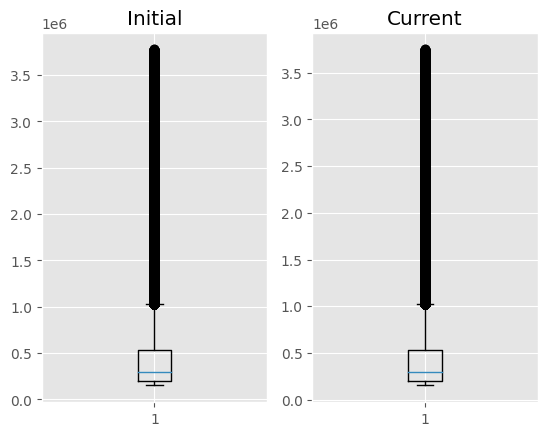

In [28]:
#boxplox looking for outliner
plt.subplot(1,2,1)
plt.boxplot(df_ini['InitialApprovalAmount'])
plt.title('Initial')

plt.subplot(1,2,2)
plt.boxplot(df_cur['CurrentApprovalAmount'])
plt.title('Current')
plt.show()